<center><h2> Hypothesis 1 </h2></center>

- H0: Air quality of boroughs in Inner London = Air quality of boroughs in Outer London
- H1: Air quality of boroughs in Inner London != Air quality of boroughs in Outer London

Data 
->
Inner London and Outer London is as defined by the borough dataset. Before we conduct the hypothesis, we need to get all the air quality data for all Inner London boroughs into one array, similary for Outer Boroughts. We have 14 inner city boroughs, 19 outer city boroughs, each with 24 air quality data point observed over last 24hours.

In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import data_cleaning as dc
import api

import hypothesis_tests as ht
import hypothesis_full as hy
import visualizations as vis


size of Inner London 336
size of Outer London 456
Inner London  mean, std, var are:  (72.91369047619048, 7.0648562280659775, 49.912193523242635)
Outer London  mean, std, var are:  (77.80701754385964, 8.14439554689319, 66.33117882425361)
Welch t-stat is 9.013 degree of freedom is 769.137
p-value is:  0.0

Based on the p value of 0.0 and our aplha of 0.01 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between Inner London
and Outer London
with an effect size, cohen's d, of -0.635 and power of 1.0.


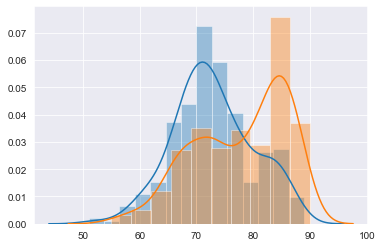

In [8]:
# hypothesis testing using full set of original air quality data from API
status, coh_d_orig = hy.hypothesis_test_group('inner_outer','Inner London','Outer London', two_sided = True, alpha = 0.01,
                          sampling = False)


The distribution of the two samples are not quite normal distributions, especially the Outer London sample. Also its not clear the variance are the same between two samples.

Given that we have around 300 to 450 data points, we will conduct random samples, calculated the mean and use the sample means for our t-test. As by central limit theorem the sample means should follow a normal distribution and hence satisfy the normality assumption for t-tests.

size of Inner London 1000
size of Outer London 1000
Inner London  mean, std, var are:  (72.92072, 1.0247174642797887, 1.0500458816)
Outer London  mean, std, var are:  (77.7885, 1.2053687195211265, 1.4529137500000002)
Welch t-stat is 97.249 degree of freedom is 1947.545
p-value is:  0.0

Based on the p value of 0.0 and our aplha of 0.01 we reject  the null hypothesis.
Due to these results, we  can state that there is a difference between Inner London
and Outer London
with an effect size, cohen's d, of -4.351 and power of 1.0.


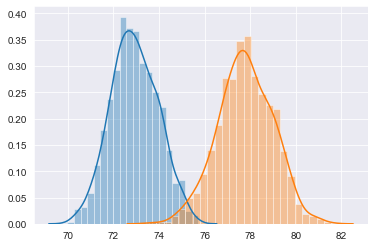

In [10]:
# hypothesis testing using sample means
status, coh_d_sampled = hy.hypothesis_test_group('inner_outer','Inner London','Outer London', two_sided = True, alpha = 0.01,
                          sampling = True, sample_size=1000)

By taking sample means of the actual air quality data, we are much more comfortable with the normality assumption (as shown by the density plot above).

For hypothesis testing, we will use the Welch's T-test as although the sample size n is the same, the population variance of inner london and outer london may or may not be the same. While assuming the population variance is the same (student t-test) seems reasonable as inner london and outer london are still close together. Welch's t-test just offers flexibility than student t-test.

------

Given that we have a near zero p-value meaning even if we set alpha (Type I error) rate to be 1%, we can still reject the Null hypothesis that air quality is the same between Inner London boroughs and Outer London boroughs. Note power is also near 100% as well.

----------


NOTE: As the p-value was near zero. We also SENSE checked the calculation with Student t-test using ttest_ind, result was similar to above.

- on the original data sample set, pvalue is very small already, for example, pvalue=7.111555995065837e-18
- on the sample mean dataset, pvalue is zero

In [11]:
print('effect_size of original data:',coh_d_orig)
print('effect_size of sample means:',coh_d_sampled)

effect_size of original data: -0.6350925257573231
effect_size of sample means: -4.351299904712064


While observing significant p-value means we can reject the null hypothesis that there is no different in air quality betwen Inner London boroughs and Outer London boroughs. We do not know how different they are. For this we look to effect size, which we calculated using Cohen's distance.

We observe that Cohen's d is quite different depending on if we use the original dataset (not normal) or the sample mean dataset. We next look to study the relationship between power and sample size to see how small the sample size can be reduced to while still getting a high power level.

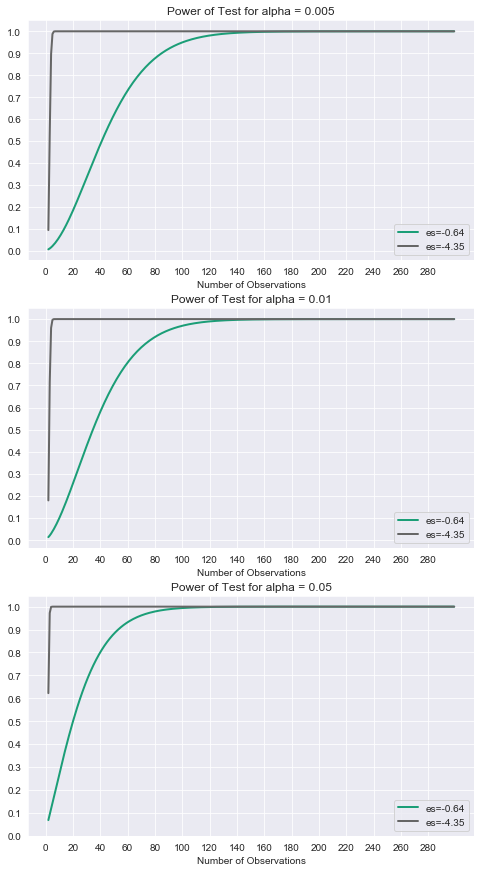

In [12]:
alpha_arr = [.005,.01,0.05]
e_sizes = [coh_d_orig, coh_d_sampled]

hy.power_n_plot(len(alpha_arr), alpha_arr, e_sizes, 300, 20)

Depending on the alpha level, we can see that if using the original air quality dataset, we only need about 80 observations to still arrive with a high enough power level of around 90%.